# Pregresión lineal para predecir los gastos médicos de pacientes

Para este ejercicio usaremos los datos de Kaggle, en el cuál se presentan datos de seguros médicos

Lo primero que vamos a ahcer es descargar la libreria llamada regressor que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [3]:
import pandas as pd
import seaborn as sns
sns.set(style = 'whitegrid',  context = 'notebook')

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando datos

Se empezara viendo cómo se distribuyen los datos de la variable a predecir

(1338, 7)


<AxesSubplot:>

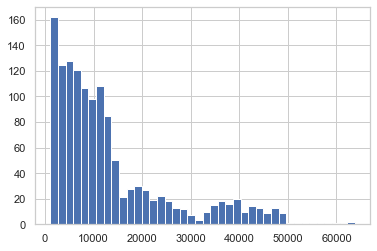

In [6]:
#Vemos las dimensiones de los datos
print(df.shape)
#Accedemos a la columna charges del dataframe para ver el histograma
df.charges.hist(bins = 40)

Algo que analizar segúneste gráfico, es entender qué  está pasando con los datos arriba de 50,000, esto porque aparencen muy pocos datos en esa zona 

In [9]:
df[df.charges>50000]
#Para este ejercicio explicativo vamos a eliminar estos datos, pero OJO en la práctica es mejor preguntarle a un experto
df= df[df.charges < 50000]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Otra variable interesante es el índice de masa corporal, que parece tener una distribución normal (Creo que sule ser lo esperado)

<AxesSubplot:>

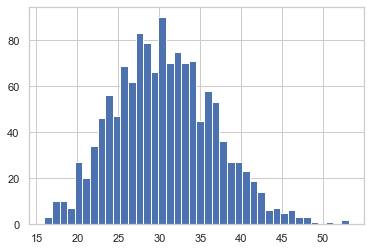

In [12]:
df.bmi.hist(bins = 40)

## Viendo correlaciones 

Ahora entendamos nuestros datos viendo cómo se distribuyen y correlacionan

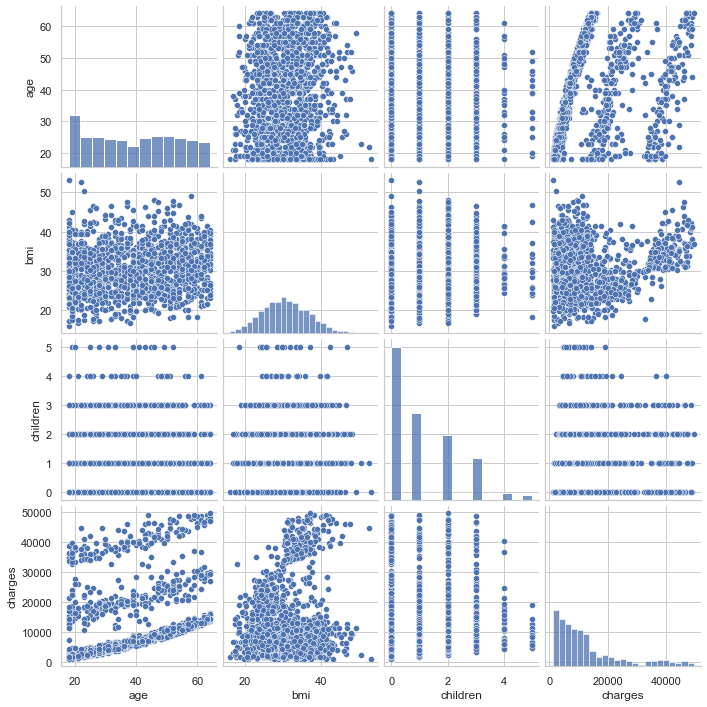

In [18]:
import matplotlib.pyplot as plt
sns.pairplot(df, height = 2.5)
plt.show()
#Notemos que para que se haga el gráfico los datos deben ser númericos

<AxesSubplot:>

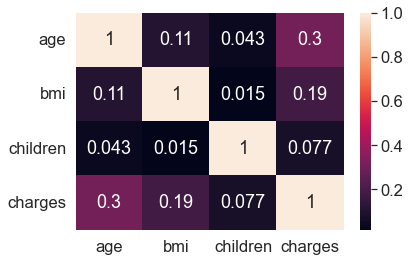

In [20]:
import numpy as np
numeric_cols = ['age', 'bmi', 'children', 'charges']
cor = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale = 1.5)
sns.heatmap(cor, annot = True, yticklabels = numeric_cols, xticklabels = numeric_cols)

## Utilizando las demás variables

Las demás variables son categoricas; sexo, fumador, región. Para poder extraer información de estas varibales vamos a usar la función get_dummies de pandas

In [24]:
df = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'], drop_first = True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Creando modelos

Primero usaremos un modelo con todas las variables

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
#Definimos las variables
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges'] 

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

#Hacemos la estandarización de todas las variables

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
#entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
#Hacemos la predicción con los datos de trueba

y_pred = model.predict(X_test) 

In [33]:
y_pred.shape

(333, 1)

## Funciones de métricas

El siguiente punto es crear  las funciones que se utilizarán para obtener las métricas del modelo

In [35]:
import sklearn.metrics as metrics

#Queremos ver que tan buenos son los datos predichos y para esto vamos a utilizar las siguientes métricas
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print('r2', r2.round(4))
print('mse', mse.round(4))

r2 0.7781
mse 0.2233


El siguiente códifo muestra un resumen de los resultados

In [39]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [41]:
y_test = y_test.reshape(-1)

print('====Summary====')
stats.summary(model, X_test, y_test, X_cols)

====Summary====
Residuals:
    Min      1Q  Median     3Q    Max
-2.0489 -0.1067  0.0954 0.2722 0.8556


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.003777    0.026041   0.1451  0.884756
children          0.041845    0.026425   1.5835  0.114248
region_southeast -0.044100    0.032115  -1.3732  0.170621
age               0.306298    0.026336  11.6303  0.000000
region_southwest -0.016746    0.031432  -0.5328  0.594535
region_northwest -0.013008    0.030796  -0.4224  0.673002
bmi               0.174178    0.026193   6.6499  0.000000
sex_male         -0.005584    0.026010  -0.2147  0.830140
smoker_yes        0.781626    0.026408  29.5981  0.000000
---
R-squared:  0.77806,    Adjusted R-squared:  0.77258
F-statistic: 141.99 on 8 features


Finalmente la función que calcula los residuales, es importante notar que es una simple resta entre los calores reales y los predichos

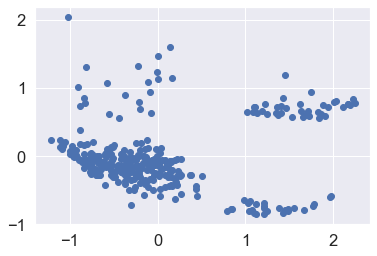

In [43]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

## Segundo modelo

Estos resultados de arriba son buenos, pero se pueden mejorar. Se intentará hacer algunas transformaciones sobre las variables que pueden ser de utilidad

In [47]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso*df_second.smoker_yes


In [66]:
#Copiamos la infromación de cómo se creó el modelo anterior
#Definimos las variables
X_cols = ['children', 'sobrepeso*fumador', 'smoker_yes', 'age2']
y_col = ['charges'] 

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

#Hacemos la estandarización de todas las variables

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression() #Aquí le decimos que el intercepto será cero
#entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
#Hacemos la predicción con los datos de trueba

y_pred = model.predict(X_test) 

In [67]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print('r2', r2.round(4))
print('mse', mse.round(4))

r2 0.8877
mse 0.0995


In [68]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [69]:
y_test = y_test.reshape(-1)

print('====Summary====')
stats.summary(model, X_test, y_test, X_cols)

====Summary====
Residuals:
    Min     1Q  Median    3Q    Max
-1.6712 0.0853  0.1282 0.147 0.3821


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.008747    0.017349   0.5042  0.614468
children           0.065811    0.016557   3.9748  0.000086
sobrepeso*fumador  0.504305    0.023570  21.3960  0.000000
smoker_yes         0.440635    0.022368  19.6997  0.000000
age2               0.321030    0.017413  18.4358  0.000000
---
R-squared:  0.88775,    Adjusted R-squared:  0.88638
F-statistic: 648.48 on 4 features


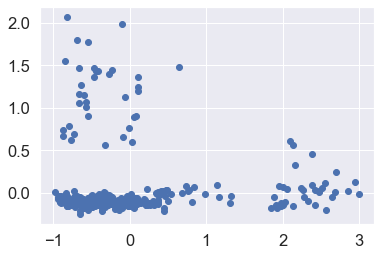

In [53]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

In [ ]:
# Com esto, vamos a empezar a analizar los resultados, empezando por eliminar las variables que tengan un p_value menor a 0.05.
#Estos cambios los hacemos aproximadamente en la celda 49